In [2]:
from skimage import data
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import warp
from skimage.transform import SimilarityTransform
from skimage.transform import rotate
from skimage.transform import rescale
from skimage.transform import AffineTransform
from skimage.util import random_noise

(900, 1200)


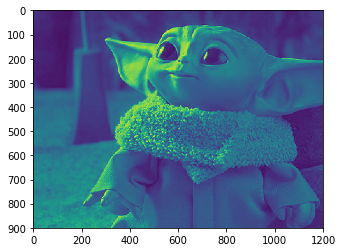

In [3]:
image=cv2.imread('dataset/yoda2.jpg',0)
plt.imshow(image)
print(image.shape)

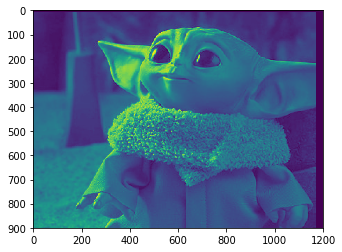

In [4]:
tform=SimilarityTransform(translation=(30,-10))
warped_image=warp(image,tform)
plt.imshow(warped_image)

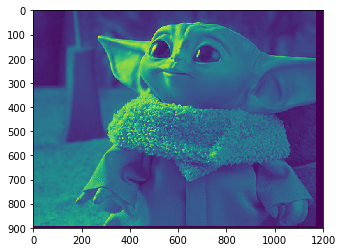

In [5]:
tform=SimilarityTransform(translation=(30,10))
warped_image=warp(image,tform)
plt.imshow(warped_image)

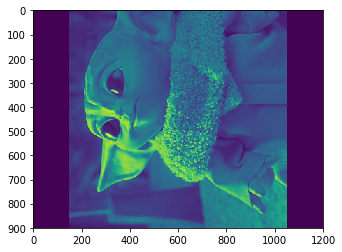

In [6]:
rotate_image=rotate(image,90)
plt.imshow(rotate_image)

(81, 108)


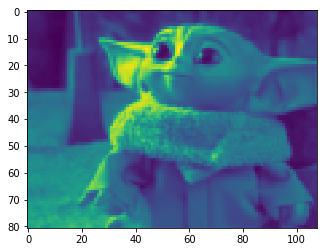

In [7]:
rescale_image=rescale(image,0.09)
plt.imshow(rescale_image)
print(rescale_image.shape)

In [8]:
duplicate=image.copy()


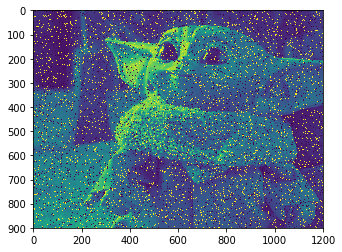

In [9]:
noise_img = random_noise(image, mode='s&p',amount=0.1)
plt.imshow(noise_img)

In [10]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):
        for j in range(len(data[0])):
            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

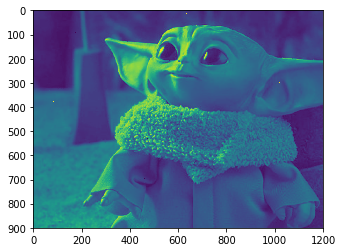

In [11]:
noise_removed=median_filter(noise_img,3)
plt.imshow(noise_removed)

In [12]:
def mean_filter(img,filter_data):
    m,n=img.shape
    mask = np.ones([filter_data,filter_data], dtype = int) 
    mask = mask /filter_data**2
    img_new = np.zeros([m, n]) 
    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 

            img_new[i, j]= temp 
            
    img_new = img_new.astype(np.uint8)
    return img_new

In [13]:
noise_removed=mean_filter(noise_img,3)

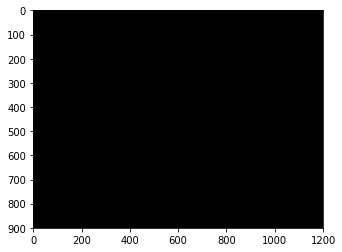

In [14]:
plt.imshow(noise_removed,cmap='gray')